In [2]:
#HW3/Assignment2
#uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [3]:
from __future__ import print_function
import pandas as pd
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [4]:
!curl https://data.cityofnewyork.us/api/views/8c3c-yspd/rows.csv?accessType=DOWNLOAD > WQData.csv
# Data source: https://data.cityofnewyork.us/Environment/Watershed-Water-Quality-Data/y43c-5n92

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70870    0 70870    0     0   192k      0 --:--:-- --:--:-- --:--:--  192k


In [5]:
#Check the environmental variable; set up a new if it does exist
if os.getenv("PUIDATA") == None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yw1665/PUIdata


In [6]:
!mv WQData.csv $PUIDATA

In [7]:
!ls $PUIDATA

WQData.csv


In [8]:
#read in the data with pandas
WQData = pd.read_csv("%s/WQData.csv"%os.getenv("PUIDATA"))

In [9]:
#Display the top 7 rows of unreducted df
WQData.head(7)

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,05/27/2015,0.80,0.95,0.95,1.10,0.95,0.90,0.94,<1
1,DEL18DT,08/28/2015,0.70,0.65,0.65,0.70,0.75,0.80,0.71,<1
2,DEL18DT,08/15/2015,0.60,0.55,0.55,0.50,0.60,0.55,0.56,<1
3,DEL18DT,08/27/2015,0.70,0.70,0.75,0.65,0.80,0.80,0.73,1
4,DEL18DT,05/31/2015,0.95,0.85,0.85,0.80,0.85,0.85,0.86,<1
5,DEL18DT,08/31/2015,0.80,0.80,0.80,0.60,0.65,0.70,0.73,<1
6,DEL18DT,08/16/2015,0.55,0.50,0.60,0.50,0.50,0.50,0.53,<1


In [10]:
WQData.columns

Index([u'Site', u'Date', u'Turbidity(NTU) at 12AM', u'Turbidity(NTU) at 4AM',
       u'Turbidity(NTU) at 8AM', u'Turbidity(NTU) at 12PM',
       u'Turbidity(NTU) at 4PM', u'Turbidity(NTU) at 8PM',
       u'Average 24hrTurbidity(NTU)', u'Coliform, Fecal(fc/100mL)'],
      dtype='object')

In [11]:
WQData.drop(columns=['Site','Date',  'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM', 'Coliform, Fecal(fc/100mL)'], inplace=True)

In [12]:
#Display the top 7 rows of reducted df
WQData.head(7)

,Turbidity(NTU) at 12AM,Average 24hrTurbidity(NTU)
0,0.80,0.94
1,0.70,0.71
2,0.60,0.56
3,0.70,0.73
4,0.95,0.86
5,0.80,0.73
6,0.55,0.53


Text(0,0.5,'Average 24hr Turbidity (NTU)')

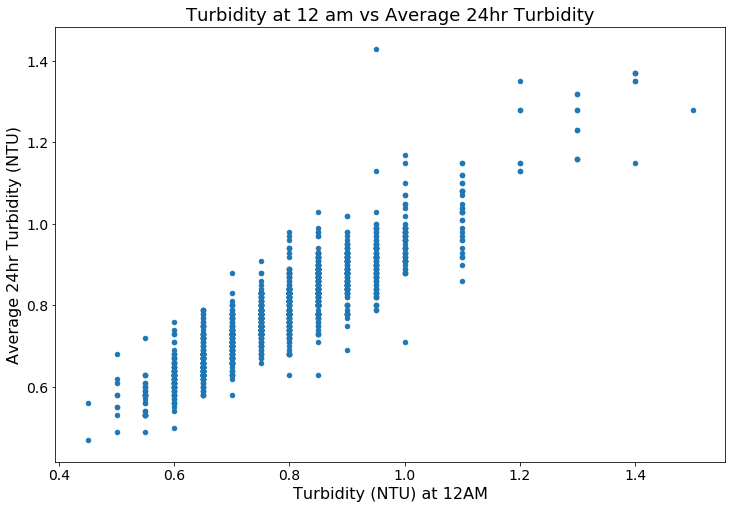

In [17]:
ax = WQData.plot.scatter(x = 'Turbidity(NTU) at 12AM', y='Average 24hrTurbidity(NTU)', figsize= (12,8), fontsize = 14)
ax.set_title('Turbidity at 12 am vs Average 24hr Turbidity',fontsize=18)
ax.set_xlabel("Turbidity (NTU) at 12AM", fontsize = 16)
ax.set_ylabel("Average 24hr Turbidity (NTU)", fontsize = 16)

Figure1: Turbidity at 12 am vs Average 24hr Turbidity. Shown that there's a positive relationship between Turbidity at 12 am and Average 24hr turbidy, which means the higher the Turbidity at 12 am, the average 24hr Turbidity also tends to be higher